# Customer Conversion Prediction


# Problem Statement

# Features: 

# Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To Ignore file warnings
import warnings
warnings.filterwarnings("ignore") 

# Reading the Datasets

In [3]:
df=pd.read_csv("train.csv")

# Analysis the Data

In [4]:
print("Data set size : ", df.shape)

Data set size :  (45211, 11)


In [5]:
# Print the Top 5 rows in the given Dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [6]:
# Print the Bottom 5 rows in the given Dataset
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [7]:
# TO find the columns in dataset
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [8]:
# for basic statistical analysis of given dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [9]:
# To verify the data whether balanced or not
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
#To Find the percentage of the data
print('% for "no": ',((39916) / (39916+5289)) * 100 )
print('% for "yes": ',((5289) / (39916+5289)) * 100 )

% for "no":  88.29996681782988
% for "yes":  11.700033182170113


# Data Preprocessing

In [11]:
 # To find the Missing Values or Null Values
 df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [12]:
# To find the Duplicate Values
df.duplicated().sum()

6

In [13]:
# DRop the Duplicates
df = df.drop_duplicates()

In [14]:
# To verify whether the data contains duplicates or not
df.duplicated().sum()

0

In [15]:
# To Verify the datatypes
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# To find the Categoical columns of Unique Values

In [16]:
print("Categorical of Jobs:  \n")
print(df['job'].unique())

Categorical of Jobs:  

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [17]:
print("Categorical Marital Satus:  \n")
print(df['marital'].unique())

Categorical Marital Satus:  

['married' 'single' 'divorced']


In [18]:
print("Categorical of Eucational Qualuification:  \n")
print(df['education_qual'].unique())

Categorical of Eucational Qualuification:  

['tertiary' 'secondary' 'unknown' 'primary']


In [19]:
print("Categorical of Call Type:  \n")
print(df['call_type'].unique())

Categorical of Call Type:  

['unknown' 'cellular' 'telephone']


In [20]:
print("Categorical of Months:  \n")
print(df['mon'].unique())

Categorical of Months:  

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [21]:
print("Categorical of Previous Outcomes:  \n")
print(df['prev_outcome'].unique())

Categorical of Previous Outcomes:  

['unknown' 'failure' 'other' 'success']


In [22]:
print("Categorical of Target Variable 'y' \n")
print(df['y'].unique())

Categorical of Target Variable 'y' 

['no' 'yes']


# Exploaration of the dataset and replace the unknown values respectively.

In [23]:
df['target'] = df["y"].map({"yes":1 , "no": 0})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


Age

In [24]:
#Comparison with Target Vs Age
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

Job

In [25]:
#Comparison with Target Vs Job
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [26]:
# To replace the unknown values as null
df['job'] =df['job'].replace('unknown',np.nan)

In [27]:
# To sum the mo of null values in job columns
df.job.isnull().sum()

288

In [28]:
# To drop the all the null values from the Job Cloumns
df=df.dropna(subset=['job'])

In [29]:
# To verify the whether the job cloumns have null values or not
df.job.isnull().sum()

0

Marital Status

In [30]:
# #Comparison with Target Vs Marital Status
df.groupby('marital')['target'].mean()

marital
divorced    0.119653
married     0.101233
single      0.149371
Name: target, dtype: float64

Educational Qualification

In [31]:
# #Comparison with Target Vs Educational Qualification
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086483
secondary    0.105543
tertiary     0.150226
unknown      0.135260
Name: target, dtype: float64

In [32]:
# To find the unknown values percentage
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


In [33]:
# To replace the unkown values as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [34]:
# To sum the null vlaues of educational coulmns
df.education_qual.isnull().sum()

1730

In [35]:
# To drop the all null values in the educational qualification cloumns
df = df. dropna(subset=['education_qual'])

In [36]:
# To verify the whether the educational qaulification cloumns have null values or not
df.education_qual.isnull().sum()

0

Call Type

In [37]:
#Comparison with Target Vs CallType
df.groupby('call_type')['target'].mean()

call_type
cellular     0.147572
telephone    0.129918
unknown      0.041358
Name: target, dtype: float64

In [38]:
# To find the percentage of unknown value for call type columns
print('Percentage for "Unknown Call Type": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown Call Type":  22.501282333113505


Day

In [39]:
#Comparison with Target Vs Day
df.groupby('day')['target'].mean()

day
1     0.278689
2     0.139179
3     0.166506
4     0.160350
5     0.114143
6     0.094111
7     0.086832
8     0.105802
9     0.113284
10    0.224206
11    0.121689
12    0.153696
13    0.152387
14    0.109305
15    0.141298
16    0.133734
17    0.090812
18    0.100584
19    0.069444
20    0.070396
21    0.098929
22    0.162286
23    0.131111
24    0.143192
25    0.155556
26    0.105634
27    0.125933
28    0.075331
29    0.074052
30    0.173531
31    0.073702
Name: target, dtype: float64

Month

In [40]:
#Comparison with Target Vs Month
df.groupby('mon')['target'].mean()

mon
apr    0.192553
aug    0.109196
dec    0.465000
feb    0.165022
jan    0.100152
jul    0.088788
jun    0.105062
mar    0.537946
may    0.067319
nov    0.101510
oct    0.430435
sep    0.471805
Name: target, dtype: float64

Duration

In [41]:
#Comparison with Target Vs Duration
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1558, dtype: float64

Number of Calls

In [42]:
#Comparison with Target Vs No of Calls
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145221
2     0.110841
3     0.111237
4     0.088902
5     0.079859
6     0.072123
7     0.064655
8     0.058140
9     0.065147
10    0.050980
11    0.078947
12    0.026846
13    0.048780
14    0.047059
15    0.049383
16    0.026667
17    0.076923
18    0.000000
19    0.000000
20    0.023810
21    0.030303
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.076923
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
Name: target, dtype: float64

Previous Outcomes

In [43]:
#Comparison with Target Vs Previous Outcomes
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.124655
other      0.165163
success    0.643961
unknown    0.091383
Name: target, dtype: float64

In [44]:
#To Find the Previous outcomes unknown value
print('Percentage for "Previous Outcomnes Unknown Value": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Previous Outcomnes Unknown Value":  81.69124968161715


Target Variable Y

In [45]:
# To find the count of target variable Y
df.y.value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# Outlier Detection

Age

<AxesSubplot:xlabel='age'>

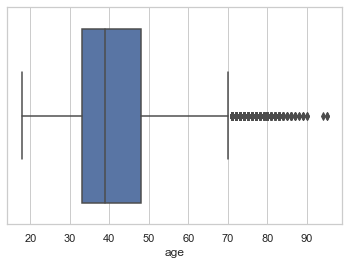

In [47]:
#Outlier Detuction using vertical boxplot by a categorical variable 'age'
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

IQR

In [48]:
#To detecting anomalies from Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper Age IQR:",upper,"Lower Age IQR :", lower)

Upper Age IQR: 70.5 Lower Age IQR : 10.5


In [49]:
df.age = df.age.clip(10.5,70.5)

In [50]:
#Trimming anomalies from Variable 'Age' & Capping the same
df.age = df.age.clip(10.5,70.5)

In [51]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

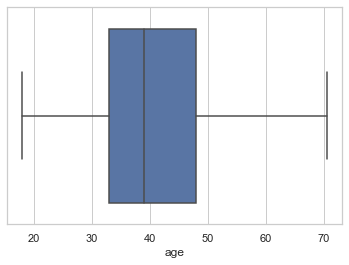

In [52]:
# To verify the after anomalies Trimming.
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

Day

<AxesSubplot:xlabel='day'>

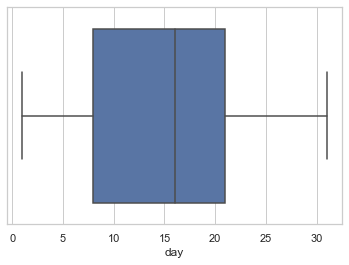

In [53]:
#Outlier Detuction using vertical boxplot by a categorical variable 'day'
sns.set(style="whitegrid")
sns.boxplot(x=df['day'])

In the 'day' boxplot doesn't have any anomalies.

Duration

<AxesSubplot:xlabel='dur'>

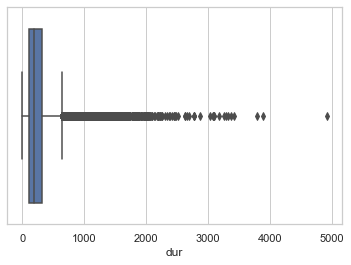

In [54]:
#Outlier Detuction using vertical boxplot by a categorical variable 'duration'
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'])

IQR

In [55]:
#To detecting anomalies from duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [56]:
#Trimming anomalies from Variable 'duration' & Capping the same
df.dur = df.dur.clip(-219.5,640.5)
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

<AxesSubplot:xlabel='dur'>

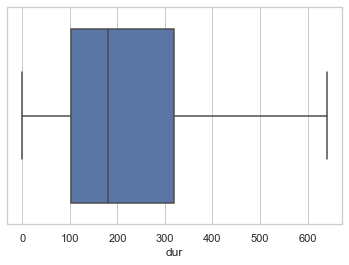

In [57]:
#To verify the after anomalies Trimming.
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'])

No of Calls

<AxesSubplot:xlabel='num_calls'>

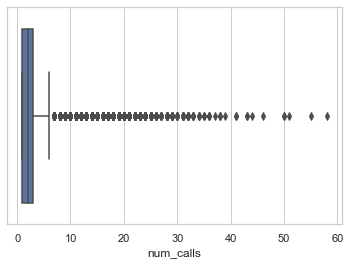

In [58]:
#Outlier Detuction using vertical boxplot by a categorical variable 'no of calls'
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'])

IQR

In [59]:
#To detecting anomalies from no of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [60]:
#Trimming anomalies from Variable 'no of calls' & Capping the same
df.num_calls = df.num_calls.clip(-2,6.0)
df.num_calls.describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<AxesSubplot:xlabel='num_calls'>

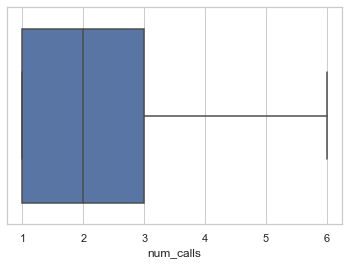

In [61]:
#To verify the after anomalies Trimming.
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'])

# EDA Multivariate Analysis

Its looks at more than two variables. 
Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In [62]:
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

<AxesSubplot:>

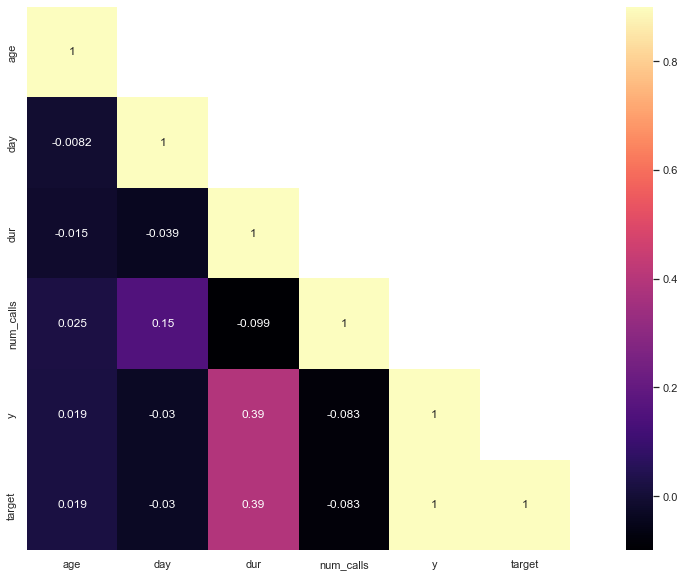

In [63]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="magma")

# Encoding

Encoding leads to a better model and most algorithms cannot handle the categorical variables unless they are converted into a numerical value.

In [64]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Job

In [65]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,0,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1.0,unknown,0,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1.0,unknown,0,0
5,35.0,8,married,tertiary,unknown,5,may,139.0,1.0,unknown,0,0
6,28.0,8,single,tertiary,unknown,5,may,217.0,1.0,unknown,0,0


Marital Status

In [66]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1.0,unknown,0,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1.0,unknown,0,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1.0,unknown,0,0
5,35.0,8,1,tertiary,unknown,5,may,139.0,1.0,unknown,0,0
6,28.0,8,3,tertiary,unknown,5,may,217.0,1.0,unknown,0,0


Educational Qulaification

In [67]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1.0,unknown,0,0
1,44.0,5,3,2,unknown,5,may,151.0,1.0,unknown,0,0
2,33.0,2,1,2,unknown,5,may,76.0,1.0,unknown,0,0
5,35.0,8,1,3,unknown,5,may,139.0,1.0,unknown,0,0
6,28.0,8,3,3,unknown,5,may,217.0,1.0,unknown,0,0


Month

In [68]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1.0,unknown,0,0
1,44.0,5,3,2,unknown,5,1,151.0,1.0,unknown,0,0
2,33.0,2,1,2,unknown,5,1,76.0,1.0,unknown,0,0
5,35.0,8,1,3,unknown,5,1,139.0,1.0,unknown,0,0
6,28.0,8,3,3,unknown,5,1,217.0,1.0,unknown,0,0


Call Type

In [69]:
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1.0,unknown,0,0
1,44.0,5,3,2,1,5,1,151.0,1.0,unknown,0,0
2,33.0,2,1,2,1,5,1,76.0,1.0,unknown,0,0
5,35.0,8,1,3,1,5,1,139.0,1.0,unknown,0,0
6,28.0,8,3,3,1,5,1,217.0,1.0,unknown,0,0


Previous Outcome

In [70]:
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1.0,1,0,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,0,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,0,0
5,35.0,8,1,3,1,5,1,139.0,1.0,1,0,0
6,28.0,8,3,3,1,5,1,217.0,1.0,1,0,0


# Feature & Target Selection

In [71]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [72]:
# X --> Feature y-- > Target
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# Spliting 

In [73]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

# Balancing

In [74]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [75]:
print(len(x_train_smt))
print(len(y_train_smt))

52630
52630


# Scaling

In [76]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Modelling- Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7641815235008104

In [78]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.8689844 , 0.1310156 ],
       [0.9906747 , 0.0093253 ],
       [0.89184113, 0.10815887],
       ...,
       [0.23524299, 0.76475701],
       [0.14490513, 0.85509487],
       [0.97063936, 0.02936064]])

In [79]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


# K-Nearset Neighbour(KNN)

In [80]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,10,30,50,70,90,100]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8679088343847903
K value : 2 Train Score :  0.9950978529355881 Cross Value Accuracy : 0.888747666409167
K value : 3 Train Score :  0.9774463233897017 Cross Value Accuracy : 0.8844652590017595
K value : 4 Train Score :  0.9772373171195136 Cross Value Accuracy : 0.8929150036479122
K value : 5 Train Score :  0.9672240167205016 Cross Value Accuracy : 0.8903687073516158
K value : 10 Train Score :  0.9563556906707201 Cross Value Accuracy : 0.8955773089137805
K value : 30 Train Score :  0.933631008930268 Cross Value Accuracy : 0.893261555298056
K value : 50 Train Score :  0.9261067832034962 Cross Value Accuracy : 0.8925671108536115
K value : 70 Train Score :  0.9225536766102983 Cross Value Accuracy : 0.8900208145573151
K value : 90 Train Score :  0.9206156184685541 Cross Value Accuracy : 0.8890946204025578
K value : 100 Train Score :  0.9196085882576477 Cross Value Accuracy : 0.8884003100725291


In [81]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7897661495716601
AUROC on the sampled dataset :  0.5760520504222824


# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [83]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7963704071074369


In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.782994489834695  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8108303249097473  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8666159984799544  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.9068782063461904  Cross val score :  0.8953474368052874
Depth  :  5  Training Accuracy :  0.9146684400532016  Cross val score :  0.8973152976267114
Depth  :  6  Training Accuracy :  0.930039901197036  Cross val score :  0.8944200356207889
Depth  :  7  Training Accuracy :  0.9377731331939958  Cross val score :  0.8937251888330975
Depth  :  8  Training Accuracy :  0.9443853315599468  Cross val score :  0.891641855499764
Depth  :  9  Training Accuracy :  0.9527835835075052  Cross val score :  0.8910627494528132
Depth  :  10  Training Accuracy :  0.9626258787763633  Cross val score :  0.891642660186258


In [85]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9146684400532016
AUROC on the sampled dataset :  0.8626001368638679


# XG Boost

In [86]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.1,0.2,0.5,0.7,0.9,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9451453543606309  Cross-Val score :  0.8970835479163984
Learning rate :  0.02  Train score :  0.954436633098993  Cross-Val score :  0.896736325694176
Learning rate :  0.03  Train score :  0.9613148394451834  Cross-Val score :  0.898125214583065
Learning rate :  0.1  Train score :  0.9790423712711381  Cross-Val score :  0.8975465108793614
Learning rate :  0.2  Train score :  0.9850275508265248  Cross-Val score :  0.8997451826101885
Learning rate :  0.5  Train score :  0.9945278358350751  Cross-Val score :  0.897430636024205
Learning rate :  0.7  Train score :  0.997548926467794  Cross-Val score :  0.8946516512166859
Learning rate :  0.9  Train score :  0.9993349800494015  Cross-Val score :  0.8915267853311016
Learning rate :  1  Train score :  0.9996959908797264  Cross-Val score :  0.8868960827861464


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [88]:
#verifying the cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.9626258787763633  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9626258787763633  Cross val score :  0.8846565947993769
Depth  :  3  Training Accuracy :  0.9626258787763633  Cross val score :  0.890561206747017
Depth  :  4  Training Accuracy :  0.9626258787763633  Cross val score :  0.8944106667158277
Depth  :  5  Training Accuracy :  0.9626258787763633  Cross val score :  0.8966684152353404
Depth  :  6  Training Accuracy :  0.9626258787763633  Cross val score :  0.8988971196381301
Depth  :  7  Training Accuracy :  0.9626258787763633  Cross val score :  0.9018784152604795
Depth  :  8  Training Accuracy :  0.9626258787763633  Cross val score :  0.9040201800467085
Depth  :  9  Training Accuracy :  0.9626258787763633  Cross val score :  0.9035281730446127
Depth  :  10  Training Accuracy :  0.9626258787763633  Cross val score :  0.905930555567194


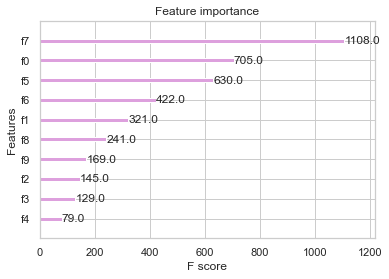

In [89]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model,color='plum')
plt.show()

# Each Models AUROC Value 

# Conclusion

Based on the results obtained from the evaluation of the five classification models (Logistic Regression, KNN, Decision Tree C, XGBoost and Random forest classification) on the given historical data, Random Forest classification performed the other models with the highest accuracy score of 90.5% and the highest AUROC score of 0.905.